In [1]:
# univariate lstm example
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import ConvLSTM2D
from tensorflow.keras import optimizers

In [2]:
df = pd.read_csv("pc_0251.csv")

FileNotFoundError: ignored

In [ ]:
df = df['Product_Demand']

In [ ]:
df

0       1
1       3
2       1
3       5
4      20
       ..
379     2
380     1
381     1
382    10
383    20
Name: Product_Demand, Length: 384, dtype: int64

In [ ]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# define input sequence
timeseries_data = df.to_numpy()
# choose a number of time steps
n_steps = 100
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [ ]:
print(X),print(y)

[[ 1  3  1 ...  2 50  1]
 [ 3  1  5 ... 50  1  1]
 [ 1  5 20 ...  1  1 10]
 ...
 [ 1  4 30 ... 10  2  1]
 [ 4 30 10 ...  2  1  1]
 [30 10  1 ...  1  1 10]]
[ 1 10  5  2  1  2  4  3 20 10  2 10  5  2  2  3  1  5  3 10  1 10  1  1
 10  4  3  1  2  1  2 20  4  1  1  1  1 10  1  1  3 10  5  1  2 50  5  1
  3  2 10  6  4 10  2  1  1  2  1  1 10  1 10  1  5  1  3  1  1  4 10  2
  5  1 20 10 10 10  1 10 50  1  2  1  4  1  2  2  1  1 10  2  2  1 10 10
  1  5 10  1  1  1 10 10 10  1  4 20  2 50  1  3  2  1 30  1 20  8  5  3
  1  1  2 50 10  1  1  5  3  3 20 30  1  1 50  5 10  1  1  1  2  2 10  1
  2  1  2  2  2  4  1 50 20 10  1  2  1 10  2 10  4  2  1  2  2  2  1  5
  2  1 10  1  1 50  2  1 20  2  2  2  1  1  4 30 10  1  4  4  1 10  1  1
  1  1 10  2  1 10  2  3  1  4  1 50 20  2 10  1 10  3  1  1  1 10 10 10
 10  2  5 50 10  3  1  3  1  1 10  3  2 50  1 12  1  1  5 20  2  5  1  1
 50  8  1  2  3  3 10 10 10  5 10 10  2 10 10 50  1 20 10 10  1  2 10 10
  5  1 10 10 10  2  1  2  1 50  1  5 10  

(None, None)

In [ ]:
X.shape

(284, 100)

In [ ]:
# choose a number of time steps
n_steps = 100
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 1
n_steps = 100
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))

In [ ]:
# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1, activation='relu'))
adam = optimizers.Adam(lr=0.001)
model.compile(optimizer=adam, loss='mse')

In [ ]:
# fit model
model.fit(X, y, epochs=150, verbose=1)

Train on 284 samples
Epoch 1/150
284/284 [==============================] - 3s 9ms/sample - loss: 146.0449
Epoch 2/150
284/284 [==============================] - 0s 1ms/sample - loss: 122.1479
Epoch 3/150
284/284 [==============================] - 0s 1ms/sample - loss: 116.6532
Epoch 4/150
284/284 [==============================] - 0s 1ms/sample - loss: 112.3275
Epoch 5/150
284/284 [==============================] - 0s 1ms/sample - loss: 108.7572
Epoch 6/150
284/284 [==============================] - 0s 1ms/sample - loss: 104.8451
Epoch 7/150
284/284 [==============================] - 0s 1ms/sample - loss: 100.8472
Epoch 8/150
284/284 [==============================] - 0s 1ms/sample - loss: 96.2379
Epoch 9/150
284/284 [==============================] - 0s 1ms/sample - loss: 92.0431
Epoch 10/150
284/284 [==============================] - 0s 1ms/sample - loss: 89.2655
Epoch 11/150
284/284 [==============================] - 0s 1ms/sample - loss: 85.5403
Epoch 12/150
284/284 [=============

In [ ]:
model.save("model0251.h5")

In [ ]:
timeseries_data = timeseries_data.astype(float)
x_input=timeseries_data[-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
#temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[25.441076]
1 day input [ 1.          4.          4.          1.         10.          1.
  1.          1.          1.         10.          2.          1.
 10.          2.          3.          1.          4.          1.
 50.         20.          2.         10.          1.         10.
  3.          1.          1.          1.         10.         10.
 10.         10.          2.          5.         50.         10.
  3.          1.          3.          1.          1.         10.
  3.          2.         50.          1.         12.          1.
  1.          5.         20.          2.          5.          1.
  1.         50.          8.          1.          2.          3.
  3.         10.         10.         10.          5.         10.
 10.          2.         10.         10.         50.          1.
 20.         10.         10.          1.          2.         10.
 10.          5.          1.         10.         10.         10.
  2.          1.          2.          1.         50.          1.
 

In [ ]:
list2 = [1 if i == 0 else i for i in lst_output]

In [ ]:
print(list2)

[25.441076, 1, 10.914712, 39.043804, 1, 24.690863, 14.142349, 1.8666756, 13.511246, 1.9582988]


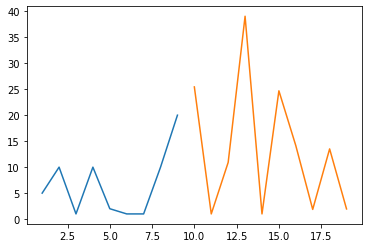

In [ ]:
import matplotlib.pyplot as plt
day_new=np.arange(1,10)
day_pred=np.arange(10,20)
plt.plot(day_new,timeseries_data[-9:])
plt.plot(day_pred,list2)